In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix,roc_curve,auc

In [3]:
df=pd.read_csv('Fraud.csv')

## Importing Data

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


##### EDA(Exploratory Data Analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


###### Checking missing Values

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
#fraud vs normal transations
fraud=df[df['isFraud']==1]
normal=df[df['isFraud']==0]

In [10]:
fraud.shape

(8213, 11)

In [11]:
normal.shape

(6354407, 11)

In [12]:
fraud['amount'].describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [13]:
normal['amount'].describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [14]:
pd.crosstab(fraud['amount'].sum(),fraud['type'],rownames=['amount'])

type,CASH_OUT,TRANSFER
amount,,
1.205642e+10,4116,4097


### Observations-
 1) There are no missing values
 
 2) Type of Fraud transactions are only 'CASH_OUT' and 'TRANSFER'

### Features Selection

In [15]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

#### Conclusion-
1) isFlaggedFraud is not always set when transaction is fraud because we can clearly see isFraud is set 8213 times which is a quiet bit more time than isFlaggedFraud.Therefore we can drop isFalggedFraud columns without worring about loosing any useful infromation.


### Data Visualization

<AxesSubplot:>

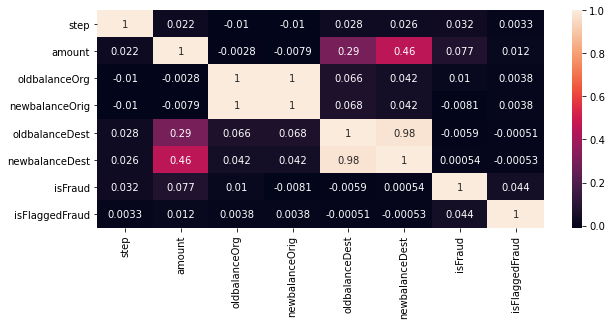

In [17]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count of Various Transactions Type'}, xlabel='type', ylabel='count'>

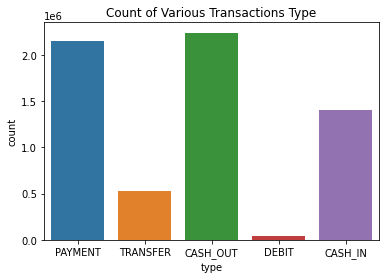

In [18]:
plt.title("Count of Various Transactions Type")
sns.countplot(df['type'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of amount'}, xlabel='amount', ylabel='Density'>

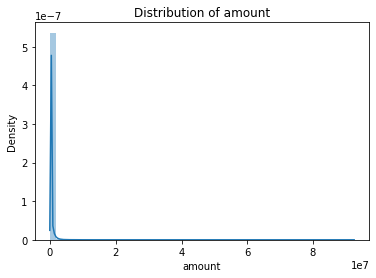

In [19]:
# distribution of amount
plt.title('Distribution of amount')
sns.distplot(df['amount'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count Of Fraud vs Normal Transactions'}, xlabel='isFraud', ylabel='count'>

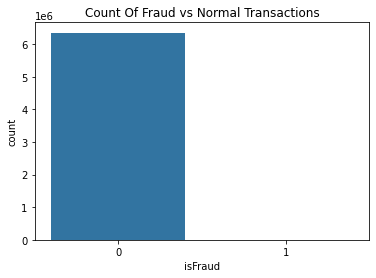

In [20]:
# count of fraud transactions
plt.title('Count Of Fraud vs Normal Transactions')
sns.countplot(df['isFraud'])

([<matplotlib.patches.Wedge at 0x1deaaa63eb0>,
 [Text(-1.1099908734039863, 0.0045012175969930115, 'Normal'),
  Text(1.199990133749636, -0.004866097361422307, 'Fraud')],
 [Text(-0.6099949844832717, 0.002473642102852015, '99.9%'),
  Text(0.6999942446872877, -0.0028385567941630117, '0.1%')])

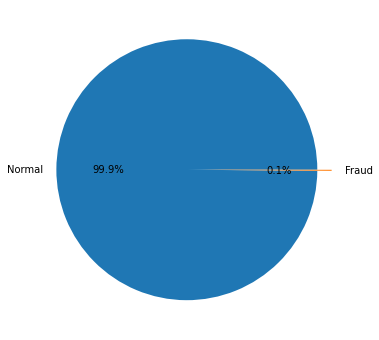

In [21]:
#percentage of fraud vs non-fraud transactions
plt.figure(figsize=(6,6))
data=df['isFraud'].value_counts()
plt.pie(data,explode=[0.01,0.1],labels=['Normal','Fraud'],
        autopct='%1.1f%%')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Fraud Amount Transactions'}, xlabel='amount', ylabel='Density'>

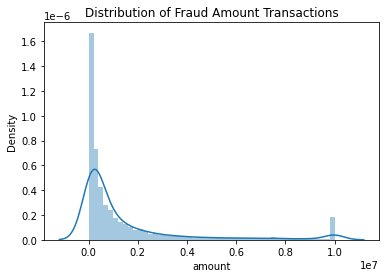

In [22]:
#plot of fraud amount 
plt.title("Distribution of Fraud Amount Transactions")
sns.distplot(fraud['amount'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Normal Amount Transactions'}, xlabel='amount', ylabel='Density'>

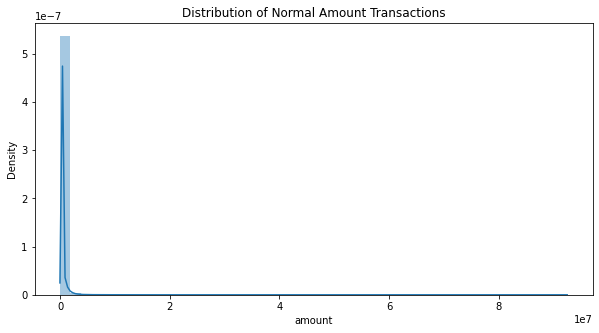

In [23]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Normal Amount Transactions")
sns.distplot(normal['amount'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

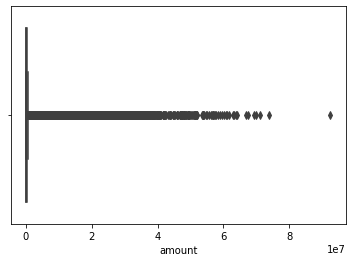

In [24]:
# checking outliers
sns.boxplot(df['amount'])

### Observations and Conclusions-
1) Most type of transactions are payment,cash_out,cash_in

2) About 0.1% of transactions are only fraud 

3) Fraud transactions amount is generally very low.


#### Categorical Data

In [25]:

dummies_type=pd.get_dummies(df['type'],drop_first=True)
dummies_type.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [26]:
label=LabelEncoder()
df['nameOrig']=label.fit_transform(df['nameOrig'])
df['nameDest']=label.fit_transform(df['nameDest'])

In [27]:
df['nameOrig'].nunique()

6353307

In [28]:
df['nameDest'].nunique()

2722362

In [29]:
final_df=pd.concat([df,dummies_type],axis=1)

In [30]:
final_df.drop(['type','isFlaggedFraud'],axis=1,inplace=True)

In [31]:
final_df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,1,0


In [32]:
X=final_df.drop(['isFraud'],axis=1)
y=final_df['isFraud']

In [33]:
X.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,1,0


In [34]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

### Model Selection
 Why XGBoost Classifier?
 1) It offers better perfromance on binary classification with a severe class imbalance
 
 2) It is gradient boosting algorithm i.e adapt learning rate depending on outliers in the datasets

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### XGBClassifier

In [36]:
from xgboost import XGBClassifier
model=XGBClassifier()

In [37]:
#imbalance data set
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.88      0.93      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.94      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


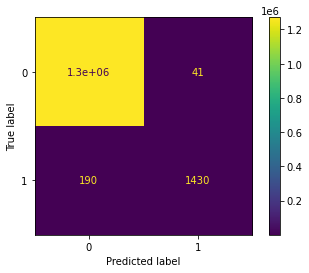

In [39]:
plot_confusion_matrix(model,X_test,y_test)

### Features Importance

In [40]:
important_features=model.get_booster().get_score(importance_type='weight')
columns=list(important_features.keys())
values=list(important_features.values())

<AxesSubplot:>

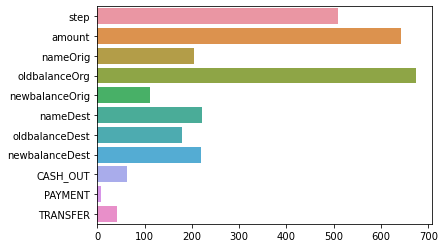

In [41]:
sns.barplot(x=values,y=columns)

### Plot ROC and  AUC

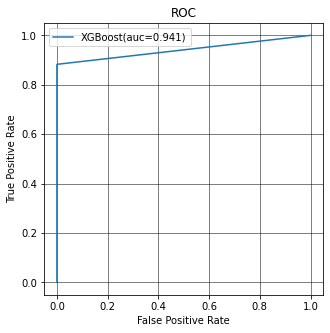

In [42]:
model_fpr,model_tpr,threshold=roc_curve(y_test,y_pred)
xg_auc=auc(model_fpr,model_tpr)
plt.figure(figsize=(5,5))
plt.plot(model_fpr,model_tpr,linestyle='-',label='XGBoost(auc=%0.3f)' % xg_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.grid(color='black',lw=0.5)

plt.legend()

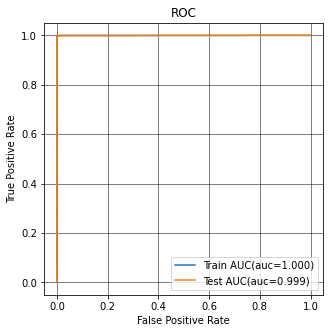

In [43]:
y_train_probs = model.predict_proba(X_train)[:,1] # converting train and test output into probability
y_test_probs= model.predict_proba(X_test)[:,1]

train_fpr,train_tpr,threshold_tr=roc_curve(y_train,y_train_probs)
test_fpr,test_tpr,threshold_te=roc_curve(y_test,y_test_probs)

auc_train=auc(train_fpr,train_tpr)
auc_test=auc(test_fpr,test_tpr)

plt.figure(figsize=(5,5))
plt.plot(train_fpr,train_tpr,linestyle='-',label='Train AUC(auc=%0.3f)' % auc_train)
plt.plot(test_fpr,test_tpr,linestyle='-',label='Test AUC(auc=%0.3f)' % auc_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.grid(color='black',lw=0.5)

plt.legend()

### Prevention and Observations-
1) F1 score is quiet high which suggest model perfectly classifies correct class

2) Speed of XGBoost is low for very large dataset in order to increase speed select more advanced classifications algorithmsU

3) Depending Upon usage of model False Positive or False Negative can be reduced.
